In [254]:
import pandas as pd
import numpy as np 
from glob import glob
import cv2
from skimage import io 
from tqdm import tqdm
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory, image
import matplotlib.pyplot as plt


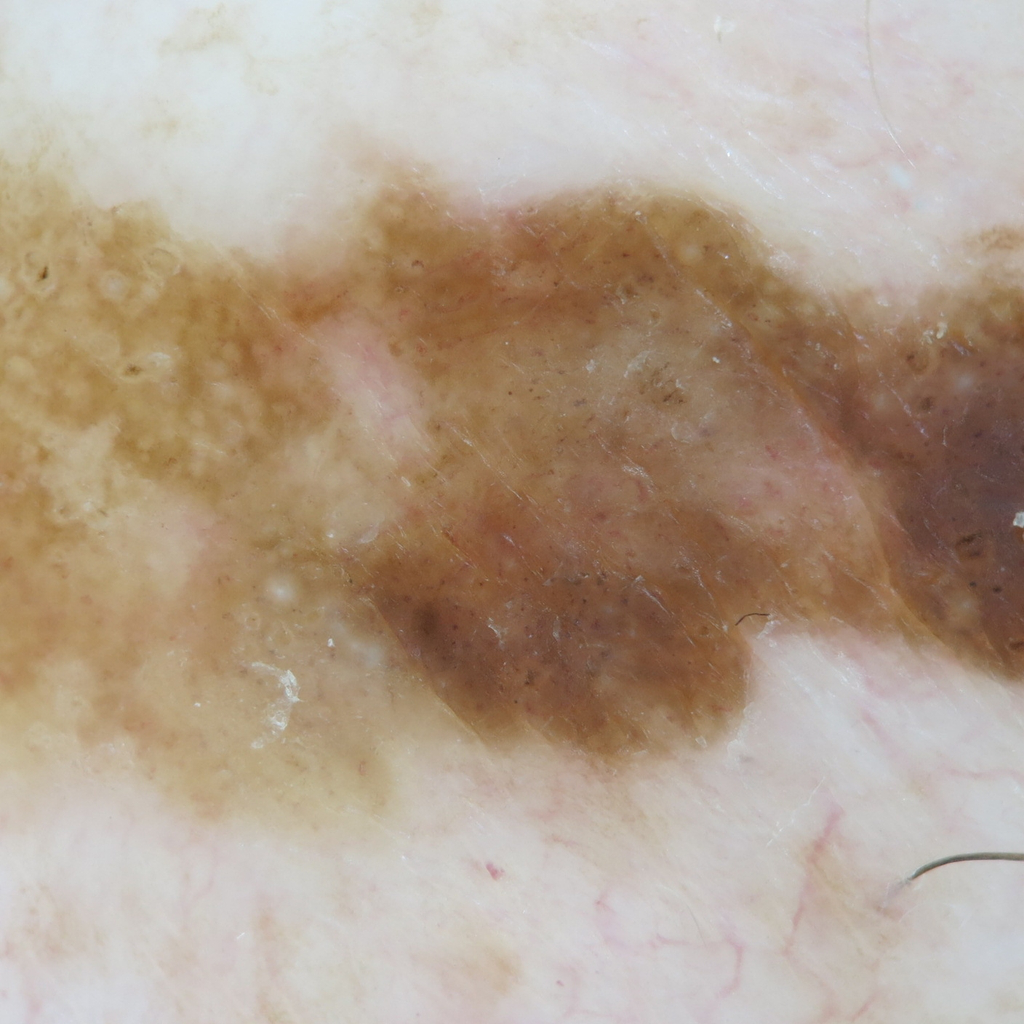

In [51]:
image.load_img('ISIC_2019_Training_Input/ISIC_0073254.jpg')

In [12]:
!mkdir '512X512-dataset-melanoma'
!mkdir '512X512-test'

mkdir: 512X512-dataset-melanoma: File exists
mkdir: 512X512-test: File exists


In [15]:
df.iloc[25]

image    ISIC_0000026_downsampled
MEL                           1.0
NV                            0.0
BCC                           0.0
AK                            0.0
BKL                           0.0
DF                            0.0
VASC                          0.0
SCC                           0.0
UNK                           0.0
Name: 25, dtype: object

In [6]:
#df_train = pd.read_csv("siim-isic-melanoma-classification/train.csv")

In [69]:
ground_truth_df = pd.read_csv("ISIC_2019_Training_GroundTruth.csv")
meta_data_df = pd.read_csv("ISIC_2019_Training_Metadata_3.csv")
ground_truth_df

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
cols=['NV','BCC','AK','BKL','DF','VASC','SCC','MEL', "UNK"]


In [72]:
for i in range(0, len(cols)):
    print("Total images of " + cols[i] + " : " + str(len(ground_truth_df[ground_truth_df[cols[i]]>0])))

Total images of NV : 12875
Total images of BCC : 3323
Total images of AK : 867
Total images of BKL : 2624
Total images of DF : 239
Total images of VASC : 253
Total images of SCC : 628
Total images of MEL : 4522
Total images of UNK : 0


In [38]:
meta_data_df

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male
...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female


In [66]:
data_df= meta_data_df.merge(ground_truth_df, how= 'inner', on='image').sample(frac=1).reset_index(drop=True) #frac keyword speicifies the fraction of rows to return in the random sample so frac =1 meants to retuen all rows in random order
data_df

,image,age_approx,anatom_site_general,lesion_id,sex,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0054531,60.0,anterior torso,BCN_0000736,male,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0067431,40.0,anterior torso,BCN_0002194,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0062656,45.0,upper extremity,BCN_0001356,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0015353_downsampled,NaN,lateral torso,NaN,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0025391,55.0,posterior torso,HAM_0005535,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0061911,70.0,upper extremity,BCN_0002724,female,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0070186,50.0,anterior torso,BCN_0001635,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25328,ISIC_0063784,40.0,anterior torso,BCN_0001759,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0061928,40.0,lower extremity,BCN_0004940,female,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [235]:
MEL=data_df[data_df.MEL==1]
MEL= list(MEL["image"].astype(str)+'.jpg')

NV=data_df[data_df.NV==1]
NV= list(NV["image"].astype(str)+'.jpg')

BCC=data_df[data_df.BCC==1]
BCC=list(BCC["image"].astype(str)+'.jpg')

AK=data_df[data_df.AK==1]
AK= list(AK["image"].astype(str)+'.jpg')

BKL=data_df[data_df.BKL==1]
BKL= list(BKL["image"].astype(str)+'.jpg')

DF=data_df[data_df.DF==1]
DF= list(DF["image"].astype(str)+'.jpg')

VASC=data_df[data_df.VASC==1]
VASC= list(VASC["image"].astype(str)+'.jpg')

SCC=data_df[data_df.SCC==1]
SCC= list(SCC["image"].astype(str)+'.jpg')


In [259]:
MEL=set(MEL)
NV=set(NV)
BCC=set(BCC)
AK=set(AK)
BKL=set(BKL)
DF=set(DF)
VASC=set(VASC)
SCC=set(SCC)

In [268]:
print(len(MEL))
print(len(NV))
print(len(BCC))
print(len(AK))
print(len(BKL))
print(len(DF))
print(len(VASC))
print(len(SCC))

4522
12875
3323
867
2624
239
253
628


In [136]:
import shutil, os
img_dir_all_images = 'ISIC_2019_Training_Input'
all_images= os.listdir(img_dir_all_images)


In [241]:
img_dir_all_images = r'Image_dir/ISIC_2019_Training_Input/'
mel_images = r'Image_dir/MEL_images/'

for filename in MEL:
    #source = img_dir_all_images + filename
    #destination = mel_images + filename
    #shutil.move(source, destination)
    #print("Moved: ", filename)
        #print("The {0} is moved to the location, {1}".format(source_path,new_location))

In [243]:
img_dir_all_images = r'Image_dir/ISIC_2019_Training_Input/'
BCC_images = r'Image_dir/BCC_images/'

for filename in BCC:
    #source = img_dir_all_images + filename
    #destination = BCC_images + filename
    #shutil.move(source, destination)
   

In [244]:
img_dir_all_images = r'Image_dir/ISIC_2019_Training_Input/'
AK_images = r'Image_dir/AK_images/'

for filename in AK:
    source = img_dir_all_images + filename
    destination = AK_images + filename
    shutil.move(source, destination)

In [247]:
img_dir_all_images = r'Image_dir/ISIC_2019_Training_Input/'
DF_images = r'Image_dir/DF_images/'

for filename in DF:
    source = img_dir_all_images + filename
    destination = DF_images + filename
    shutil.move(source, destination)


In [ ]:
img_dir_all_images = r'Image_dir/ISIC_2019_Training_Input/'
BKL_images = r'Image_dir/BKL_images/'

for filename in BKL:
    source = img_dir_all_images + filename
    destination = BKL_images + filename
    shutil.move(source, destination)

In [248]:
img_dir_all_images = r'Image_dir/ISIC_2019_Training_Input/'
VASC_images = r'Image_dir/VASC_images/'

for filename in VASC:
    source = img_dir_all_images + filename
    destination = VASC_images + filename
    shutil.move(source, destination)

In [252]:
img_dir_all_images = r'Image_dir/ISIC_2019_Training_Input/'
SCC_images = r'Image_dir/SCC_images/'

for filename in SCC:
    #source = img_dir_all_images + filename
    #destination = SCC_images + filename
    #shutil.move(source, destination)

In [ ]:
image.load_img("Image_dir/AK_images/ISIC_0024468.jpg")

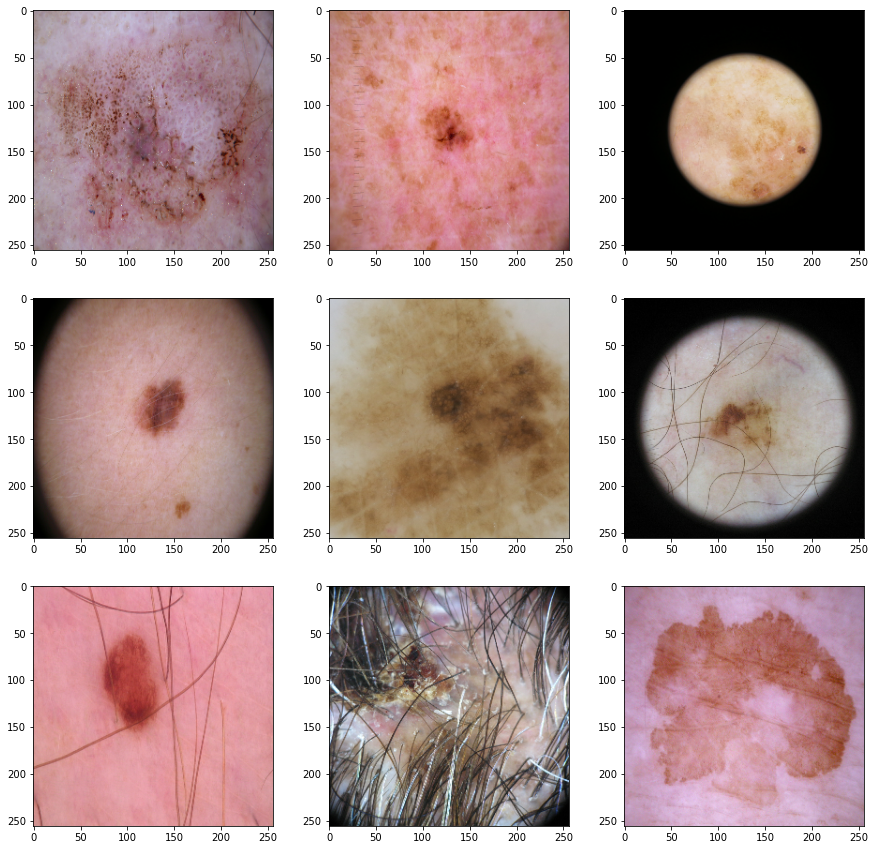

In [297]:
fig, axes= plt.subplots(3,3, figsize= (15,15))

for images, labels in training.take(1):
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(images[i].numpy().astype('uint8'))